In [50]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Read .csv file and then turn into dataframe
df_CP_EV = pd.read_csv("C:/Users/Admin/Desktop/DSMP/Raw data/Charging points and EVs group by city.csv")

In [52]:
df_CP_EV

,ONS Geography [note 6],Number of Evs in Q3/2022,Number of Charging devices
0,County Durham,"2,016",206
1,Darlington,"1,011",54
2,Hartlepool,242,8
3,Middlesbrough,270,33
4,Northumberland,"1,800",220
...,...,...,...
369,Fermanagh and Omagh,212,31
370,Lisburn and Castlereagh,796,13
371,Mid and East Antrim,422,26
372,Mid Ulster,318,24


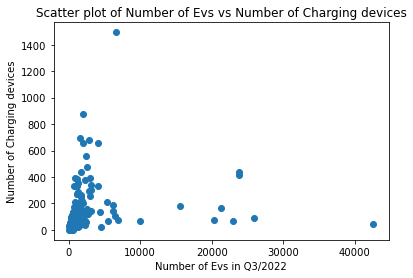

In [53]:
# convert the 'Number of Evs in Q3/2022' and 'Number of Charging devices' columns to numeric data type
df_CP_EV['Number of Evs in Q3/2022'] = df_CP_EV['Number of Evs in Q3/2022'].str.replace(',', '').astype('float64')
df_CP_EV['Number of Charging devices'] = df_CP_EV['Number of Charging devices'].str.replace(',', '').astype('float64')

# create scatter plot
plt.scatter(df_CP_EV['Number of Evs in Q3/2022'], df_CP_EV['Number of Charging devices'])

# add labels and title
plt.xlabel('Number of Evs in Q3/2022')
plt.ylabel('Number of Charging devices')
plt.title('Scatter plot of Number of Evs vs Number of Charging devices')

# show plot
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# extract variables
x = df_CP_EV["Number of Evs in Q3/2022"].values.reshape(-1, 1)
y = df_CP_EV["Number of Charging devices"].values.reshape(-1, 1)

# create polynomial regression pipeline
poly_reg = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

# define hyperparameters to search over
param_grid = {
    'poly__degree': np.arange(1, 10)
}

# perform grid search using mean squared error as evaluation metric
grid_search = GridSearchCV(poly_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

# print best hyperparameters and corresponding mean squared error
print("Best degree of freedom:", grid_search.best_params_['poly__degree'])
print("Best mean squared error:", -grid_search.best_score_)


Best degree of freedom: 1
Best mean squared error: 18410.893762445976


R-squared: 0.046150796326272614


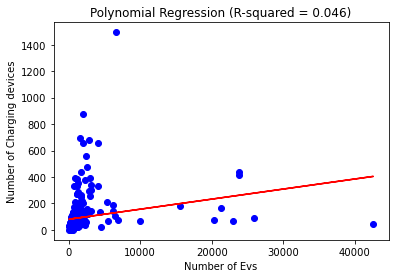

In [55]:
# extract variables
x = df_CP_EV["Number of Evs in Q3/2022"].values.reshape(-1, 1)
y = df_CP_EV["Number of Charging devices"].values.reshape(-1, 1)

# fit polynomial regression model
poly = PolynomialFeatures(degree=1)
x_poly = poly.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

# predict y values using fitted model
y_pred = poly_reg.predict(x_poly)

# calculate R-squared
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared:", r_squared)

# plot scatter plot and polynomial curve
plt.scatter(x,y, c='blue')
plt.plot(x, y_pred, color='red')
plt.title("Polynomial Regression (R-squared = {:.3f})".format(r_squared))
plt.xlabel("Number of Evs")
plt.ylabel("Number of Charging devices")
plt.show()

In [56]:
correlation_coefficient = df_CP_EV['Number of Evs in Q3/2022'].corr(df_CP_EV['Number of Charging devices'])
print('Pearson correlation coefficient:', correlation_coefficient)

Pearson correlation coefficient: 0.2148273640071785


Based on the Pearson correlation coefficient value of 0.215, we can see that there is a weak positive correlation between the number of EVs and the number of charging devices in the dataset. However, this correlation is not strong enough to indicate a significant relationship between the two variables.

It's also worth noting that correlation does not always imply causation. Other factors may be influencing the number of charging devices in each city, such as government incentives or the presence of electric vehicle manufacturers or charging infrastructure providers in the area.